In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from numba import jit, njit, prange
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
from scipy.optimize import minimize

In [2]:
DIR = Sim_res / 'Geo_Rand_Walk_2D' / 'v2_p_atmos'
if DIR.exists():
    print(*list(DIR.glob('*.txt')), sep='\n')

C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_100.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_1000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_10000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_150.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_200.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_3000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_350.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_500.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Dr

In [3]:
files = list(DIR.glob('*0.txt'))
df = np.array([np.loadtxt(files[0], skiprows=1)])
for f in files[1:]:
    df_0 = np.loadtxt(f, skiprows=1)
    df = np.append(df, [df_0], axis=0)
df = df[np.argsort(df[:,0])]

f = open(files[1], 'r')
for line in f:
    s = line.split()
    break
    
data = pd.DataFrame(df, columns=s)
data['N'] = data['N'].apply(lambda x: int(x))
data['steps'] = data['steps'].apply(lambda x: int(x)) 
data

N   n1_mean   n2_mean   n3_mean   n4_mean  uni_mean    n1_std  \
0     100  0.067676  0.335163  0.357310  0.239851  0.490868  0.033153   
1     150  0.057825  0.307874  0.356280  0.278021  0.462622  0.026299   
2     200  0.052236  0.290436  0.353706  0.303622  0.444360  0.022429   
3     350  0.043761  0.260708  0.345895  0.349636  0.412508  0.016684   
4     500  0.039590  0.244237  0.339654  0.376519  0.394394  0.013959   
5     750  0.035672  0.227586  0.331875  0.404867  0.375589  0.011506   
6    1000  0.033333  0.216963  0.326096  0.423608  0.363247  0.010109   
7    3000  0.026597  0.183363  0.303506  0.486534  0.322651  0.006449   
8    5000  0.024335  0.170867  0.293222  0.511576  0.306788  0.005359   
9    6500  0.023299  0.165178  0.288158  0.523364  0.299215  0.004906   
10   7000  0.023018  0.163397  0.286572  0.527013  0.296997  0.004797   
11   8000  0.022530  0.160699  0.284090  0.532682  0.293377  0.004590   
12   9000  0.022146  0.158301  0.281853  0.537700  0.290217  0.004424   
13  10000  0.021790  0.156277  0.279909  0.542023  0.287510  0.004276   

      n2_std    n3_std    n4_std   uni_std        p0        p1        p2  \
0   0.087256  0.066923  0.092094  0.082473  0.182831  0.246855  0.290593   
1   0.076904  0.059072  0.091072  0.074609  0.212044  0.250342  0.277737   
2   0.070394  0.054511  0.089504  0.069589  0.231971  0.251413  0.269204   
3   0.059558  0.047437  0.085118  0.061001  0.268341  0.251656  0.253724   
4   0.053668  0.043809  0.081699  0.056254  0.290471  0.250914  0.244515   
5   0.047830  0.040327  0.077527  0.051436  0.313906  0.249196  0.234730   
6   0.044158  0.038185  0.074502  0.048411  0.329962  0.247547  0.228218   
7   0.032976  0.031578  0.062995  0.038761  0.385626  0.239993  0.205155   
8   0.029017  0.029140  0.057992  0.035158  0.409736  0.235407  0.195493   
9   0.027240  0.028027  0.055635  0.033523  0.420400  0.232740  0.191620   
10  0.026742  0.027792  0.055021  0.033120  0.421036  0.233311  0.192348   
11  0.025943  0.027204  0.053829  0.032387  0.427387  0.230854  0.189233   
12  0.025233  0.026789  0.052844  0.031713  0.431959  0.232795  0.187205   
13  0.024555  0.026358  0.051881  0.031091  0.436369  0.229075  0.185300   

          p3     steps  
0   0.279720  96430000  
1   0.259877  69360000  
2   0.247413  36140000  
3   0.226279  17070000  
4   0.214100   7720000  
5   0.202167   4810000  
6   0.194273   2480000  
7   0.169226    420000  
8   0.159364    140000  
9   0.155240    100000  
10  0.153305    305000  
11  0.152525    240000  
12  0.148041    195000  
13  0.149256    160000

In [4]:
data['uni_std'] / np.sqrt(data['steps'])

0     0.000008
1     0.000009
2     0.000012
3     0.000015
4     0.000020
5     0.000023
6     0.000031
7     0.000060
8     0.000094
9     0.000106
10    0.000060
11    0.000066
12    0.000072
13    0.000078
dtype: float64

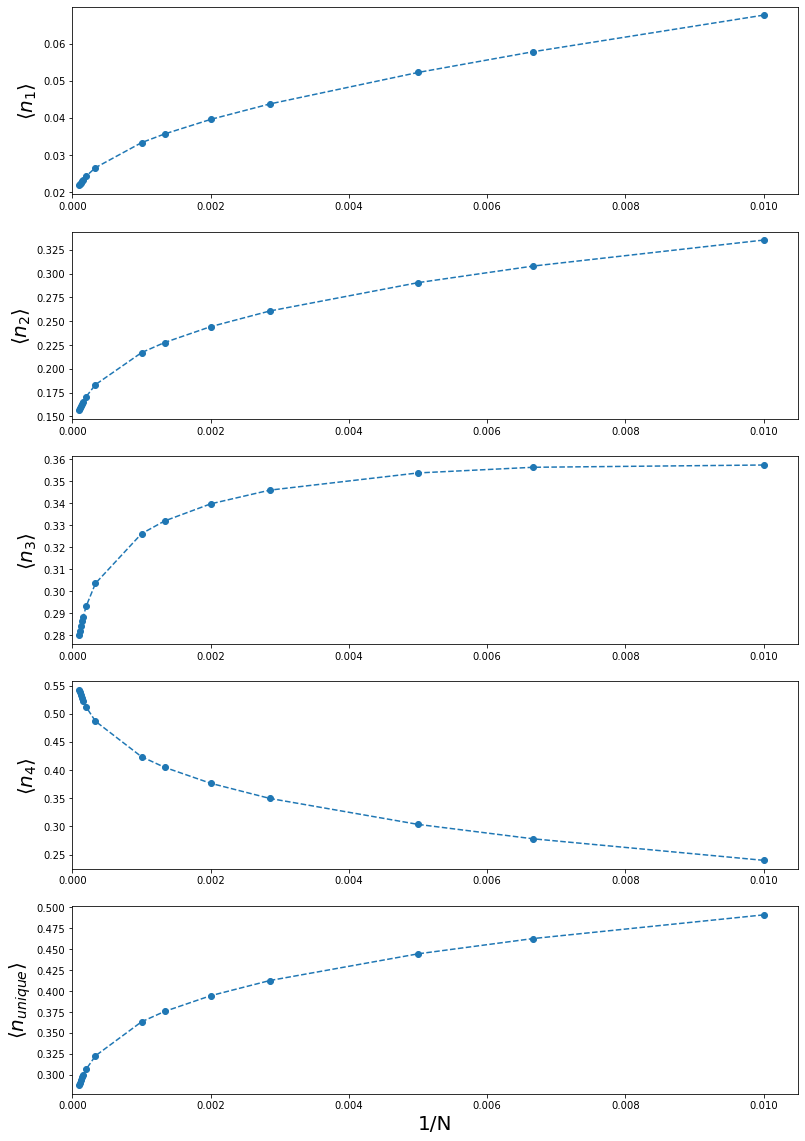

In [5]:
fig, ax = plt.subplots(5,1, figsize=(13,20))
data['1/N'] = 1/(data['N'])
x = data['1/N'] 
y_names = ['n1_mean','n2_mean','n3_mean','n4_mean','uni_mean']
dy_names = ['n1_std','n2_std','n3_std','n4_std','uni_std']
for i in range(5):
    y = data[y_names[i]]
    dy = data[dy_names[i]] / np.sqrt(data['steps'])
    ax[i].errorbar(x, y, dy, fmt='o--')
    if i < 4:
        ax[i].set_ylabel(fr'$\langle n_{i+1} \rangle$', fontsize=20)
    else:
        ax[i].set_ylabel(r'$\langle n_{unique} \rangle$', fontsize=20)
    ax[i].set_xlim(0.)
ax[-1].set_xlabel('1/N', fontsize=20);

#plt.savefig(Path.cwd() / 'Images' / 'Rand_Path_N1-4_unique.png')

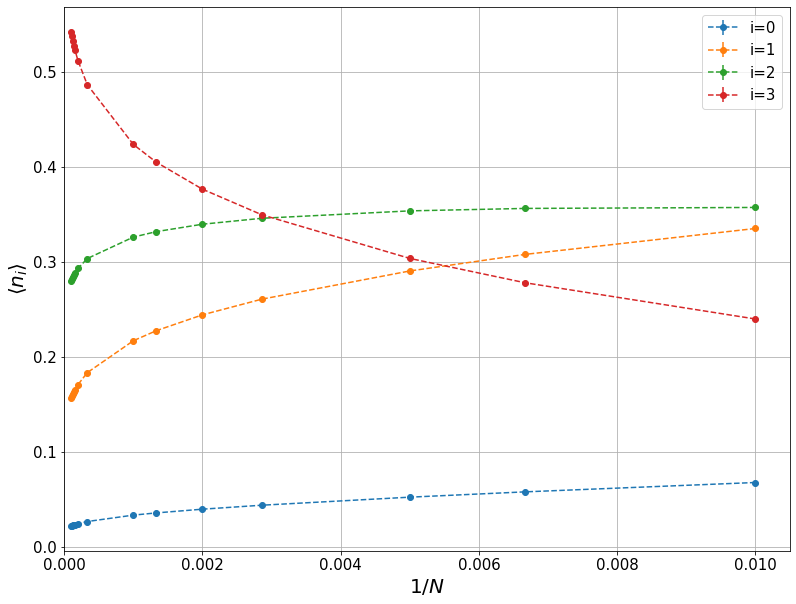

In [7]:
plt.figure(figsize=(13,10))
data['1/N'] = 1/(data['N'])
x = data['1/N'] 
y_names = ['n1_mean','n2_mean','n3_mean','n4_mean']
dy_names = ['n1_std','n2_std','n3_std','n4_std']
for i in range(4):
    y = data[y_names[i]]
    dy = data[dy_names[i]] / np.sqrt(data['steps'])
    plt.errorbar(x, y, dy, fmt='o--', label=f'i={i}')
    plt.ylabel(r'$\langle n_{i} \rangle$', fontsize=20)
    plt.xlim(0.)
plt.xlabel(r'$1/N$', fontsize=20);
plt.grid()
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)

#plt.savefig(Path.cwd() / 'Images' / 'Rand_Path_n_i.png')

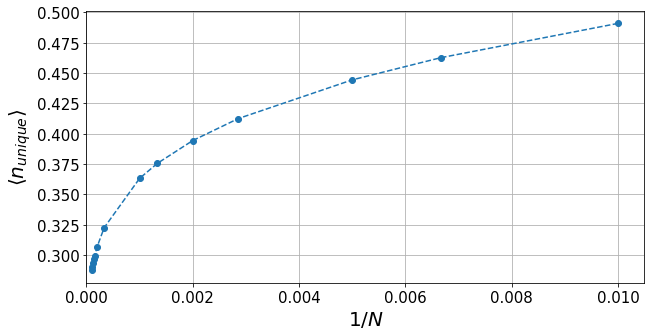

In [8]:
plt.figure(figsize=(10,5))
data['1/N'] = 1/(data['N'])
x = data['1/N'] 
y_names = ['uni_mean']
dy_names = ['uni_std']
for i in range(1):
    y = data[y_names[i]]
    dy = data[dy_names[i]] / np.sqrt(data['steps'])
    plt.errorbar(x, y, dy, fmt='o--', label=f'i={i}')
    plt.ylabel(r'$\langle n_{unique} \rangle$', fontsize=20)
    plt.xlim(0.)
plt.xlabel(r'$1/N$', fontsize=20);
plt.grid()
plt.tick_params(labelsize=15)

#plt.savefig(Path.cwd() / 'Images' / 'Rand_Path_n_unique.png')

# Проверка характера шкалирования

In [22]:
def full_scaling(x, y, dy, n, image_name=None):
    fig, axes = plt.subplots(3, 1, figsize=(10,15), constrained_layout=True)
    fig.suptitle(fr"$n_{n}$ scaling", fontsize=30)
    x_reg = x.copy()
    y_reg = y.copy()
    for i, scaling, ax in zip([0,1,2], [('linear', 'linear'), ('log', 'linear'), ('log', 'log')], axes):
        ax.errorbar(x, y, yerr=dy, fmt="s--", label=fr"MC Data of n={n}")
        ax.set_xscale(scaling[1])
        ax.set_yscale(scaling[0])
        if scaling[0] == 'linear' and scaling[1] == 'linear':
            title = 'linear scaling'
        elif scaling[0] == 'log' and scaling[1] == 'linear':
            title = 'log-linear scaling'
        else:
            title = 'log-log scaling'
        ax.set_title(title, fontsize=20)
        ax.tick_params(labelsize=16, which='both')
        ax.grid(which='both')
    axes[-1].set_xlabel('1/N', fontsize=20)
    if image_name != None:
        plt.savefig(Path.cwd() / "Images" / (image_name + ".png"))
    plt.show()

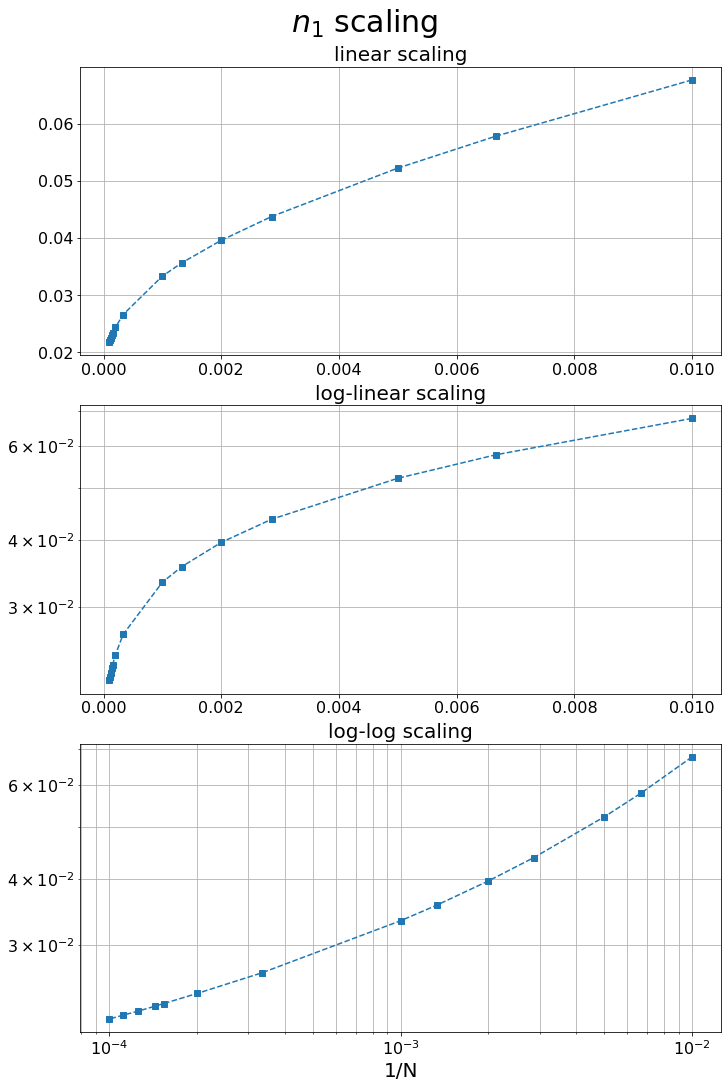

In [23]:
x = data['1/N']
y = data['n1_mean']
dy = data['n1_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 1)

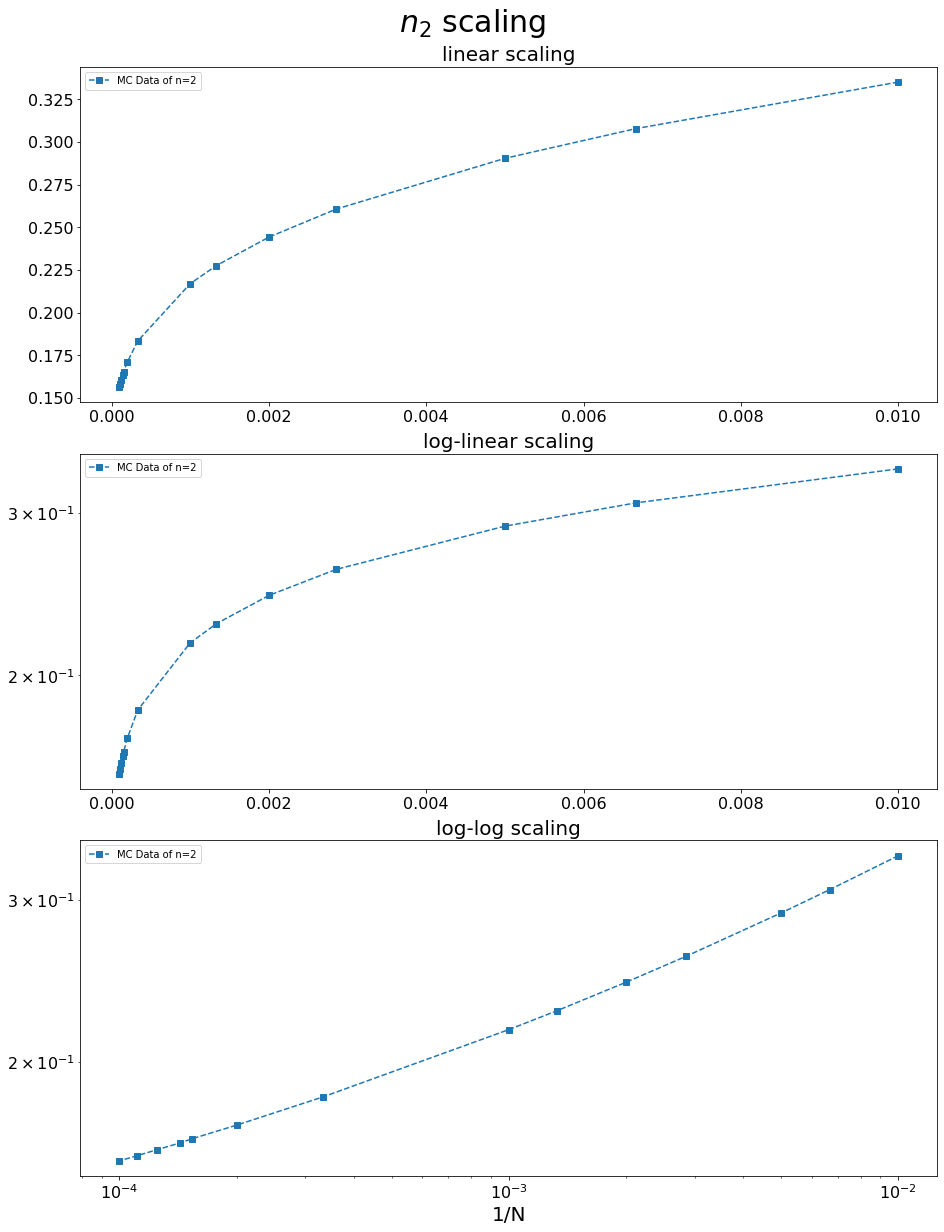

In [10]:
x = data['1/N']
y = data['n2_mean']
dy = data['n2_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 2)

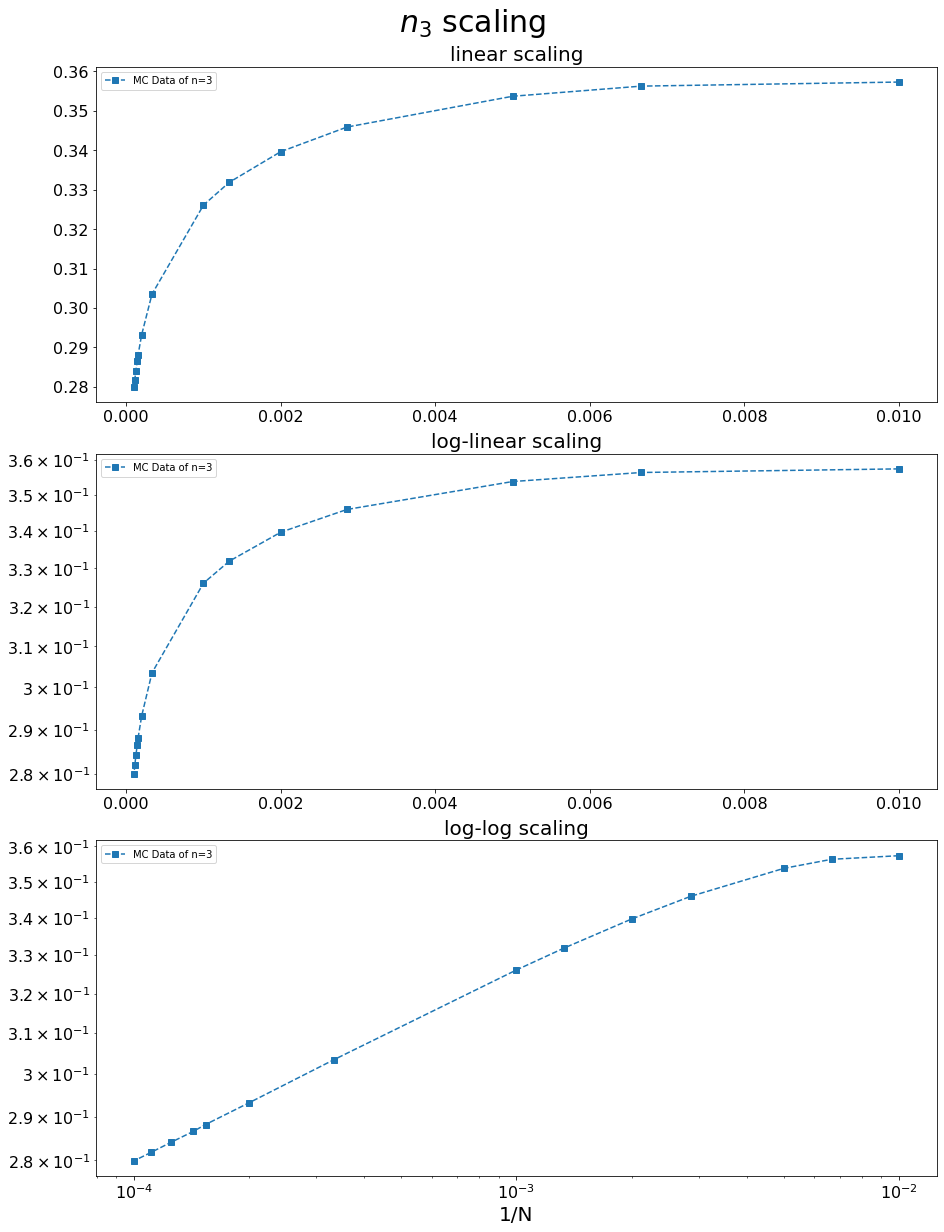

In [11]:
x = data['1/N']
y = data['n3_mean']
dy = data['n3_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 3)

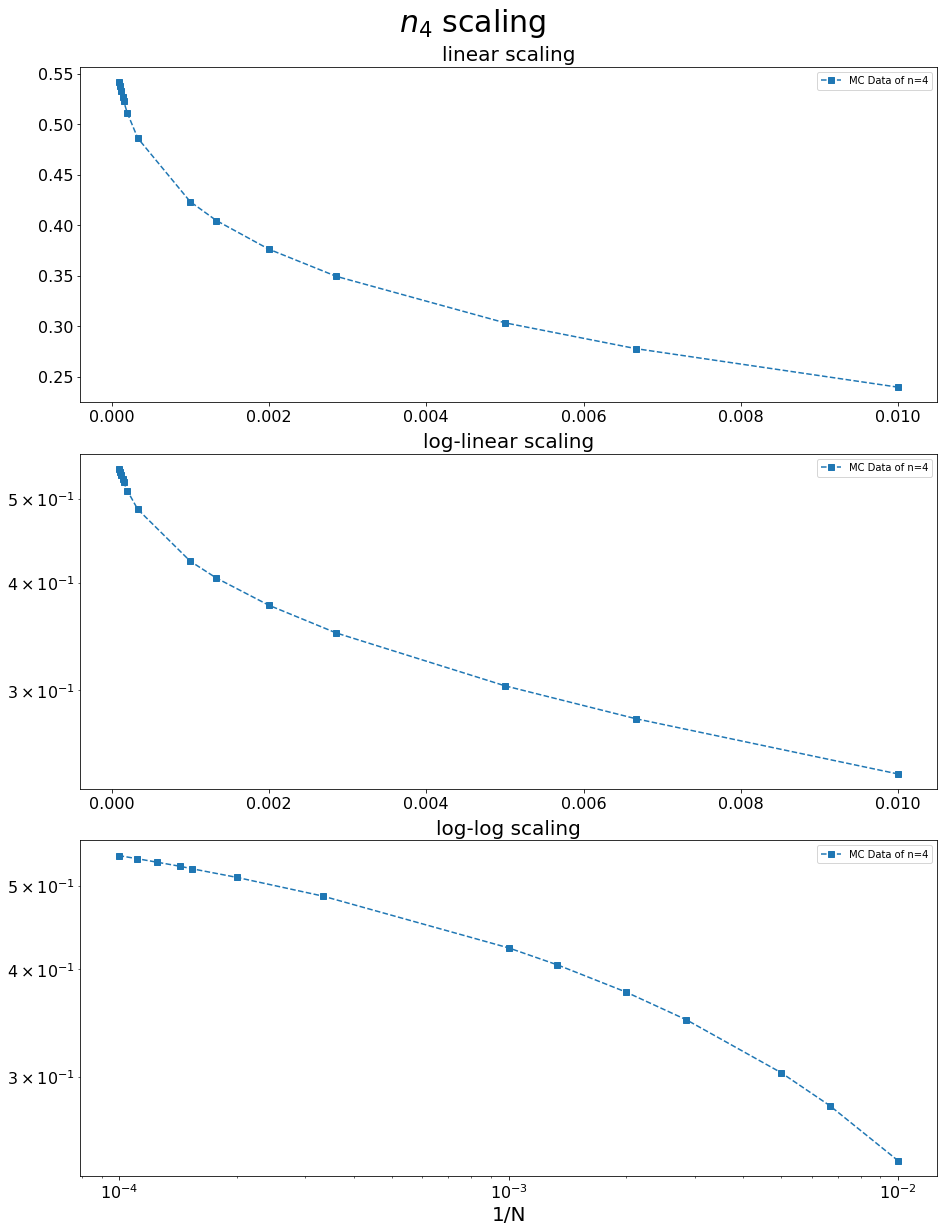

In [12]:
x = data['1/N']
y = data['n4_mean']
dy = data['n4_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 4)

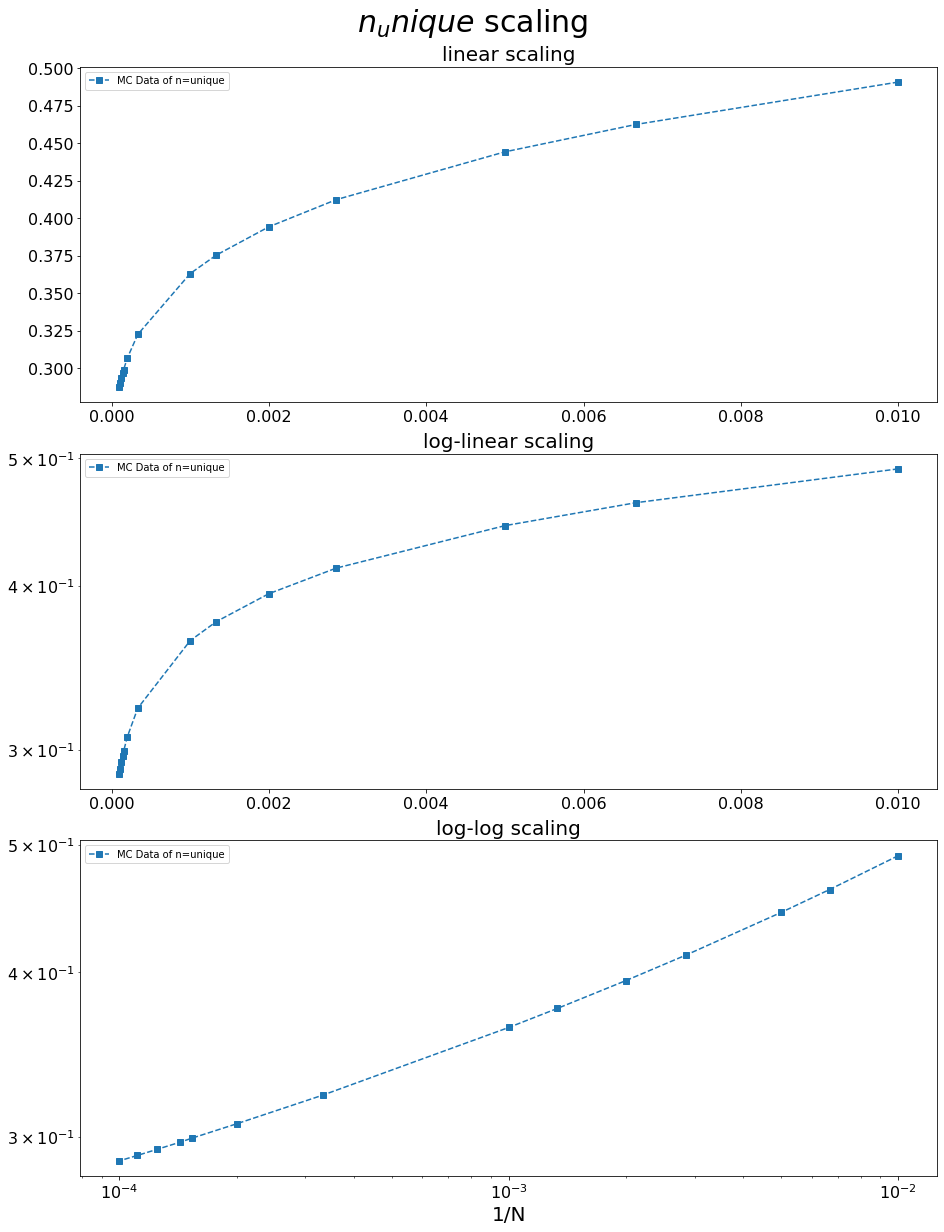

In [9]:
x = data['1/N']
y = data['uni_mean']
dy = data['uni_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 'unique')

# Оценка по лог-лог-шкалированию

In [18]:
def f_x_a(x, a):
    return a[0] * (x - a[3]) ** a[1] + a[2]

def leastsquares(a, x, y):
    s = 0
    for i in range(len(x)):
        s += (f_x_a(x[i], a) - y[i]) ** 2
    return s

def errFit(hess_inv, resVariance):
    return np.sqrt( np.diag( hess_inv * resVariance))

def log_log_scaling(x, y, dy, a_0=[1,1,0,0], text_pos=(0.0001,0.07), out_ax=None, image_name=None):
    if out_ax == None:
        fig, ax = plt.subplots(figsize=(15,9))
    else:
        ax = out_ax
    ax.errorbar(x,y,dy, fmt='s--')
    
    res = minimize(leastsquares, a_0, (x,y))
    a = res.x
    da = errFit( res.hess_inv,  res.fun)
    
    ax.plot(x, a[0] * (x - a[3]) ** a[1] + a[2])
    ax.set_xscale('log')
    ax.set_yscale('log')
    print(res.success)
    s1 = 'y = k * (1/N - x0)^a + b' + "\n"
    s2 = r'k = %.4f $\pm$ %.4f' % (a[0], da[0]) + '\n'
    s3 = r'a = %.4f $\pm$ %.4f' % (a[1], da[1]) + '\n'
    s4 = r'b = %.4f $\pm$ %.4f' % (a[2], da[2]) + '\n'
    s5 = r'x0 = %.4f $\pm$ %.4f' % (a[3], da[3])
    ax.text(*text_pos, s1 + s2 + s3 + s4 + s5, fontsize=17, bbox=dict(facecolor='brown', alpha=0.3))
    
    if image_name != None:
        plt.savefig(Path.cwd() / "Images" / (image_name + ".png"))
    return np.append(a, da)

res = pd.DataFrame(columns=['k','a','b', 'x0','d_k','d_a','d_b','d_x0', 'N_min', 'N_max'], index=['n1','n2','n3','n4','n_unique'])

3000 10000
True


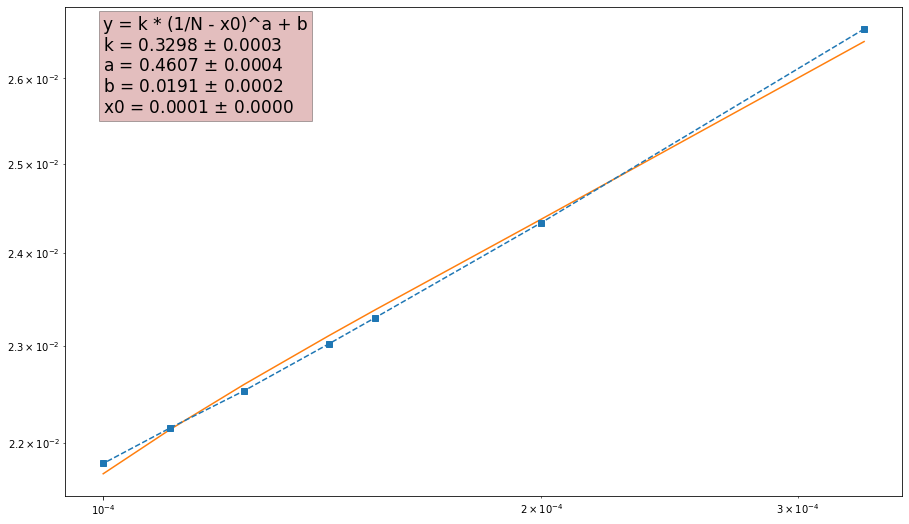

In [19]:
k=7
x = np.array(data['1/N'][k:])
y = np.array(data['n1_mean'][k:])
dy = np.array(data['n1_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [0.3, 0.5, 0.01, 0], text_pos=(0.0001, y.max()-0.001), image_name=None)
res0 = np.append(res0, [data['N'][k], data['N'][13]])
res.loc['n1'] = res0




3000 10000
True


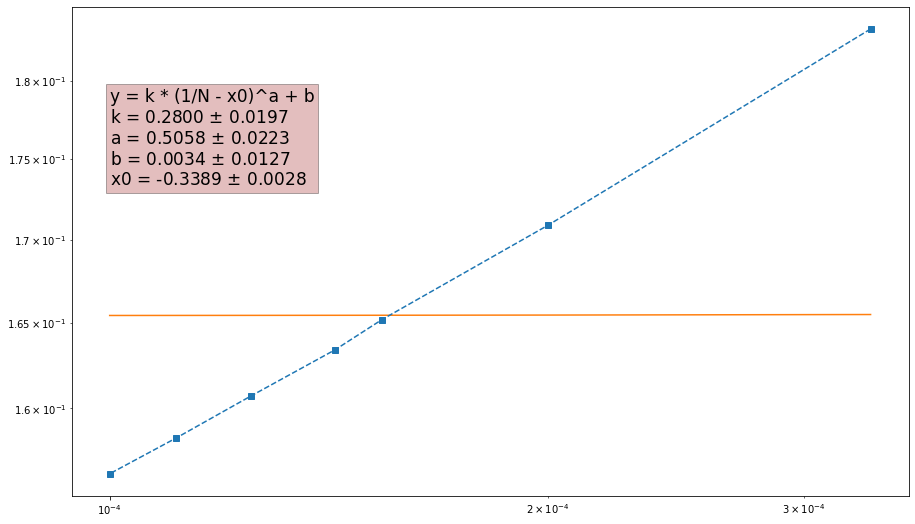

In [21]:
k=7
x = np.array(data['1/N'][k:])
y = np.array(data['n2_mean'][k:])
dy = np.array(data['n2_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [0.3, 0.5, 0.01,0], text_pos=(0.0001, y.max()-0.01), image_name=None)
res0 = np.append(res0, [data['N'][k], data['N'][13]])
res.loc['n2'] = res0

3000 10000
False


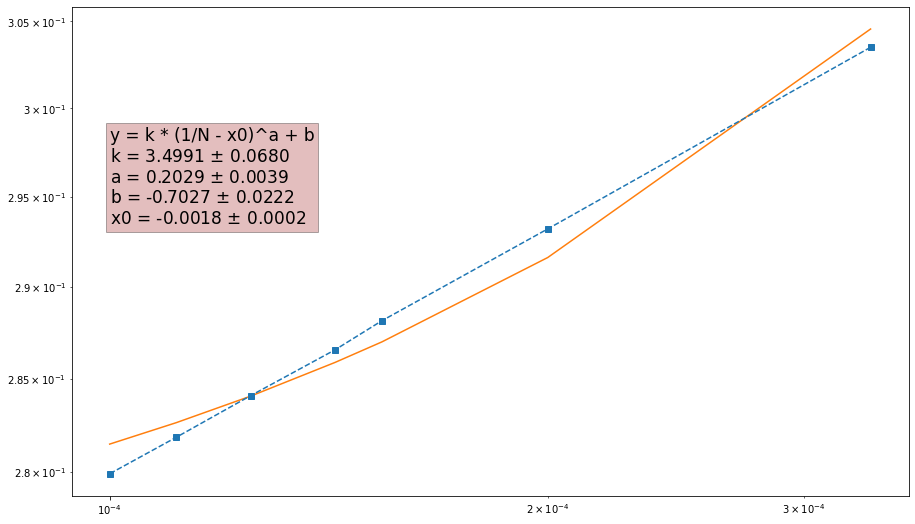

In [22]:
k=7
x = np.array(data['1/N'][k:])
y = np.array(data['n3_mean'][k:])
dy = np.array(data['n3_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [0.6, 0.2, 0.1,0], text_pos=(0.0001, y.max()-0.01), image_name=None)
res0 = np.append(res0, [data['N'][k], data['N'][13]])
res.loc['n3'] = res0

500 10000
False


C:\Users\Admin\AppData\Local\Temp\ipykernel_16108\699354520.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return a[0] * (x - a[3]) ** a[1] + a[2]
C:\Users\Admin\AppData\Local\Temp\ipykernel_16108\699354520.py:24: RuntimeWarning: invalid value encountered in power
  ax.plot(x, a[0] * (x - a[3]) ** a[1] + a[2])


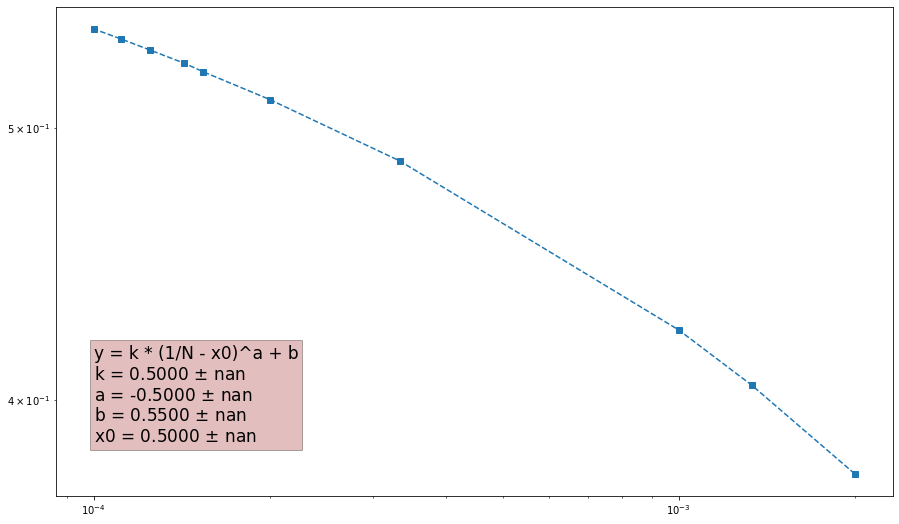

In [26]:

k=4
x = np.array(data['1/N'][k:])
y = np.array(data['n4_mean'][k:])
dy = np.array(data['n4_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [0.5, -0.5, 0.55,0.5], text_pos=(0.0001, y.min()+0.01), image_name=None)
res0 = np.append(res0, [data['N'][k], data['N'][13]])
res.loc['n4'] = res0

In [ ]:





k=4
x = np.array(data['1/N'][k:])
y = np.array(data['uni_mean'][k:])
dy = np.array(data['uni_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [0.5, 0.5, 0.55], text_pos=(0.0001, y.max()-0.025), image_name=None)
res0 = np.append(res0, [data['N'][k], data['N'][13]])
res.loc['n_unique'] = res0

In [26]:
res

k         a         b       d_k       d_a       d_b   N_min  \
n1         0.34251  0.416707  0.014445  0.000816  0.001585  0.000144  3000.0   
n2        0.572697  0.170857  0.037394  0.004116  0.001095  0.002126  3000.0   
n3        0.587875  0.218865  0.201834  0.003017  0.003484  0.003088  3000.0   
n4       -1.239466  0.189293  0.758816  0.009563   0.00326  0.004921   500.0   
n_unique  0.831172  0.204894  0.161567  0.001112  0.000195  0.000432   500.0   

            N_max  
n1        10000.0  
n2        10000.0  
n3        10000.0  
n4        10000.0  
n_unique  10000.0

In [27]:
print(res.style.to_latex())

\begin{tabular}{lllllllll}
 & k & a & b & d_k & d_a & d_b & N_min & N_max \\
n1 & 0.342510 & 0.416707 & 0.014445 & 0.000816 & 0.001585 & 0.000144 & 3000.000000 & 10000.000000 \\
n2 & 0.572697 & 0.170857 & 0.037394 & 0.004116 & 0.001095 & 0.002126 & 3000.000000 & 10000.000000 \\
n3 & 0.587875 & 0.218865 & 0.201834 & 0.003017 & 0.003484 & 0.003088 & 3000.000000 & 10000.000000 \\
n4 & -1.239466 & 0.189293 & 0.758816 & 0.009563 & 0.003260 & 0.004921 & 500.000000 & 10000.000000 \\
n_unique & 0.831172 & 0.204894 & 0.161567 & 0.001112 & 0.000195 & 0.000432 & 500.000000 & 10000.000000 \\
\end{tabular}

